In [1]:
# Libs necessárias
import pandas as pd
import numpy as np

# Libs gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Avisos
import warnings
warnings.filterwarnings('ignore')

# Configuração no pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Configuração no Matplotlib
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')

# **Exploração dos dados**

In [2]:
# Pergunta em aberto...
# Quanto vale o aluguel da sua casa?

In [3]:
# Lendo os dados
Base_Dados = pd.read_csv('house_data.csv')

# Dimensão
Base_Dados.shape

(10692, 13)

In [4]:
# Verificar
Base_Dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [5]:
# Removendo colunas
Base_Dados.drop( columns=['fire insurance (R$)', 'total (R$)'], inplace=True )

In [6]:
# Verificar
Base_Dados.shape

(10692, 11)

In [7]:
# Campos vazios
Base_Dados.isnull().sum().sort_values( ascending=False )

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [8]:
# Campos unicos
Base_Dados.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

In [9]:
# Tipos das colunas
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [10]:
# Tipo de colunas
Base_Dados.dtypes.value_counts()

int64     7
object    4
dtype: int64

# **Exploração Analitica (EDA)**

In [11]:
# Filtrar os tipos de colunas
Colunas_Categorias = Base_Dados.columns[ Base_Dados.dtypes == object ]
Colunas_Numericas = Base_Dados.columns[ Base_Dados.dtypes != object ]

Colunas_Categorias, Colunas_Numericas

(Index(['city', 'floor', 'animal', 'furniture'], dtype='object'),
 Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
        'rent amount (R$)', 'property tax (R$)'],
       dtype='object'))

In [12]:
# Analise dos campos objetos
Base_Dados['city'].value_counts( normalize=True ) * 100

São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64

In [13]:
# Loop
for Coluna in Colunas_Categorias:

  # Fazendo a analise
  Analise = Base_Dados[Coluna].value_counts( normalize=True ) * 100

  # Mostrando
  print( Coluna, '\n', Analise, '\n')

city 
 São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64 

floor 
 -      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: floor, dtype: float64 

animal 
 acept        77.777778
not acept    22.222222
Name: animal, dtype: float64 

furniture 
 not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64 



In [14]:
# Correção nos dados

# Ajustando o Andar
Base_Dados.loc[ Base_Dados['floor'] == '301' ]
Base_Dados.iloc[ 2562, 5 ] = 30

# Ajustar o '-'
Base_Dados['floor'] = Base_Dados['floor'].apply( lambda Registro : 0 if
                                                Registro == '-' else Registro )
Base_Dados['floor'] = pd.to_numeric(Base_Dados['floor'])

# Verificar
Base_Dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [15]:
len( Colunas_Numericas )

7

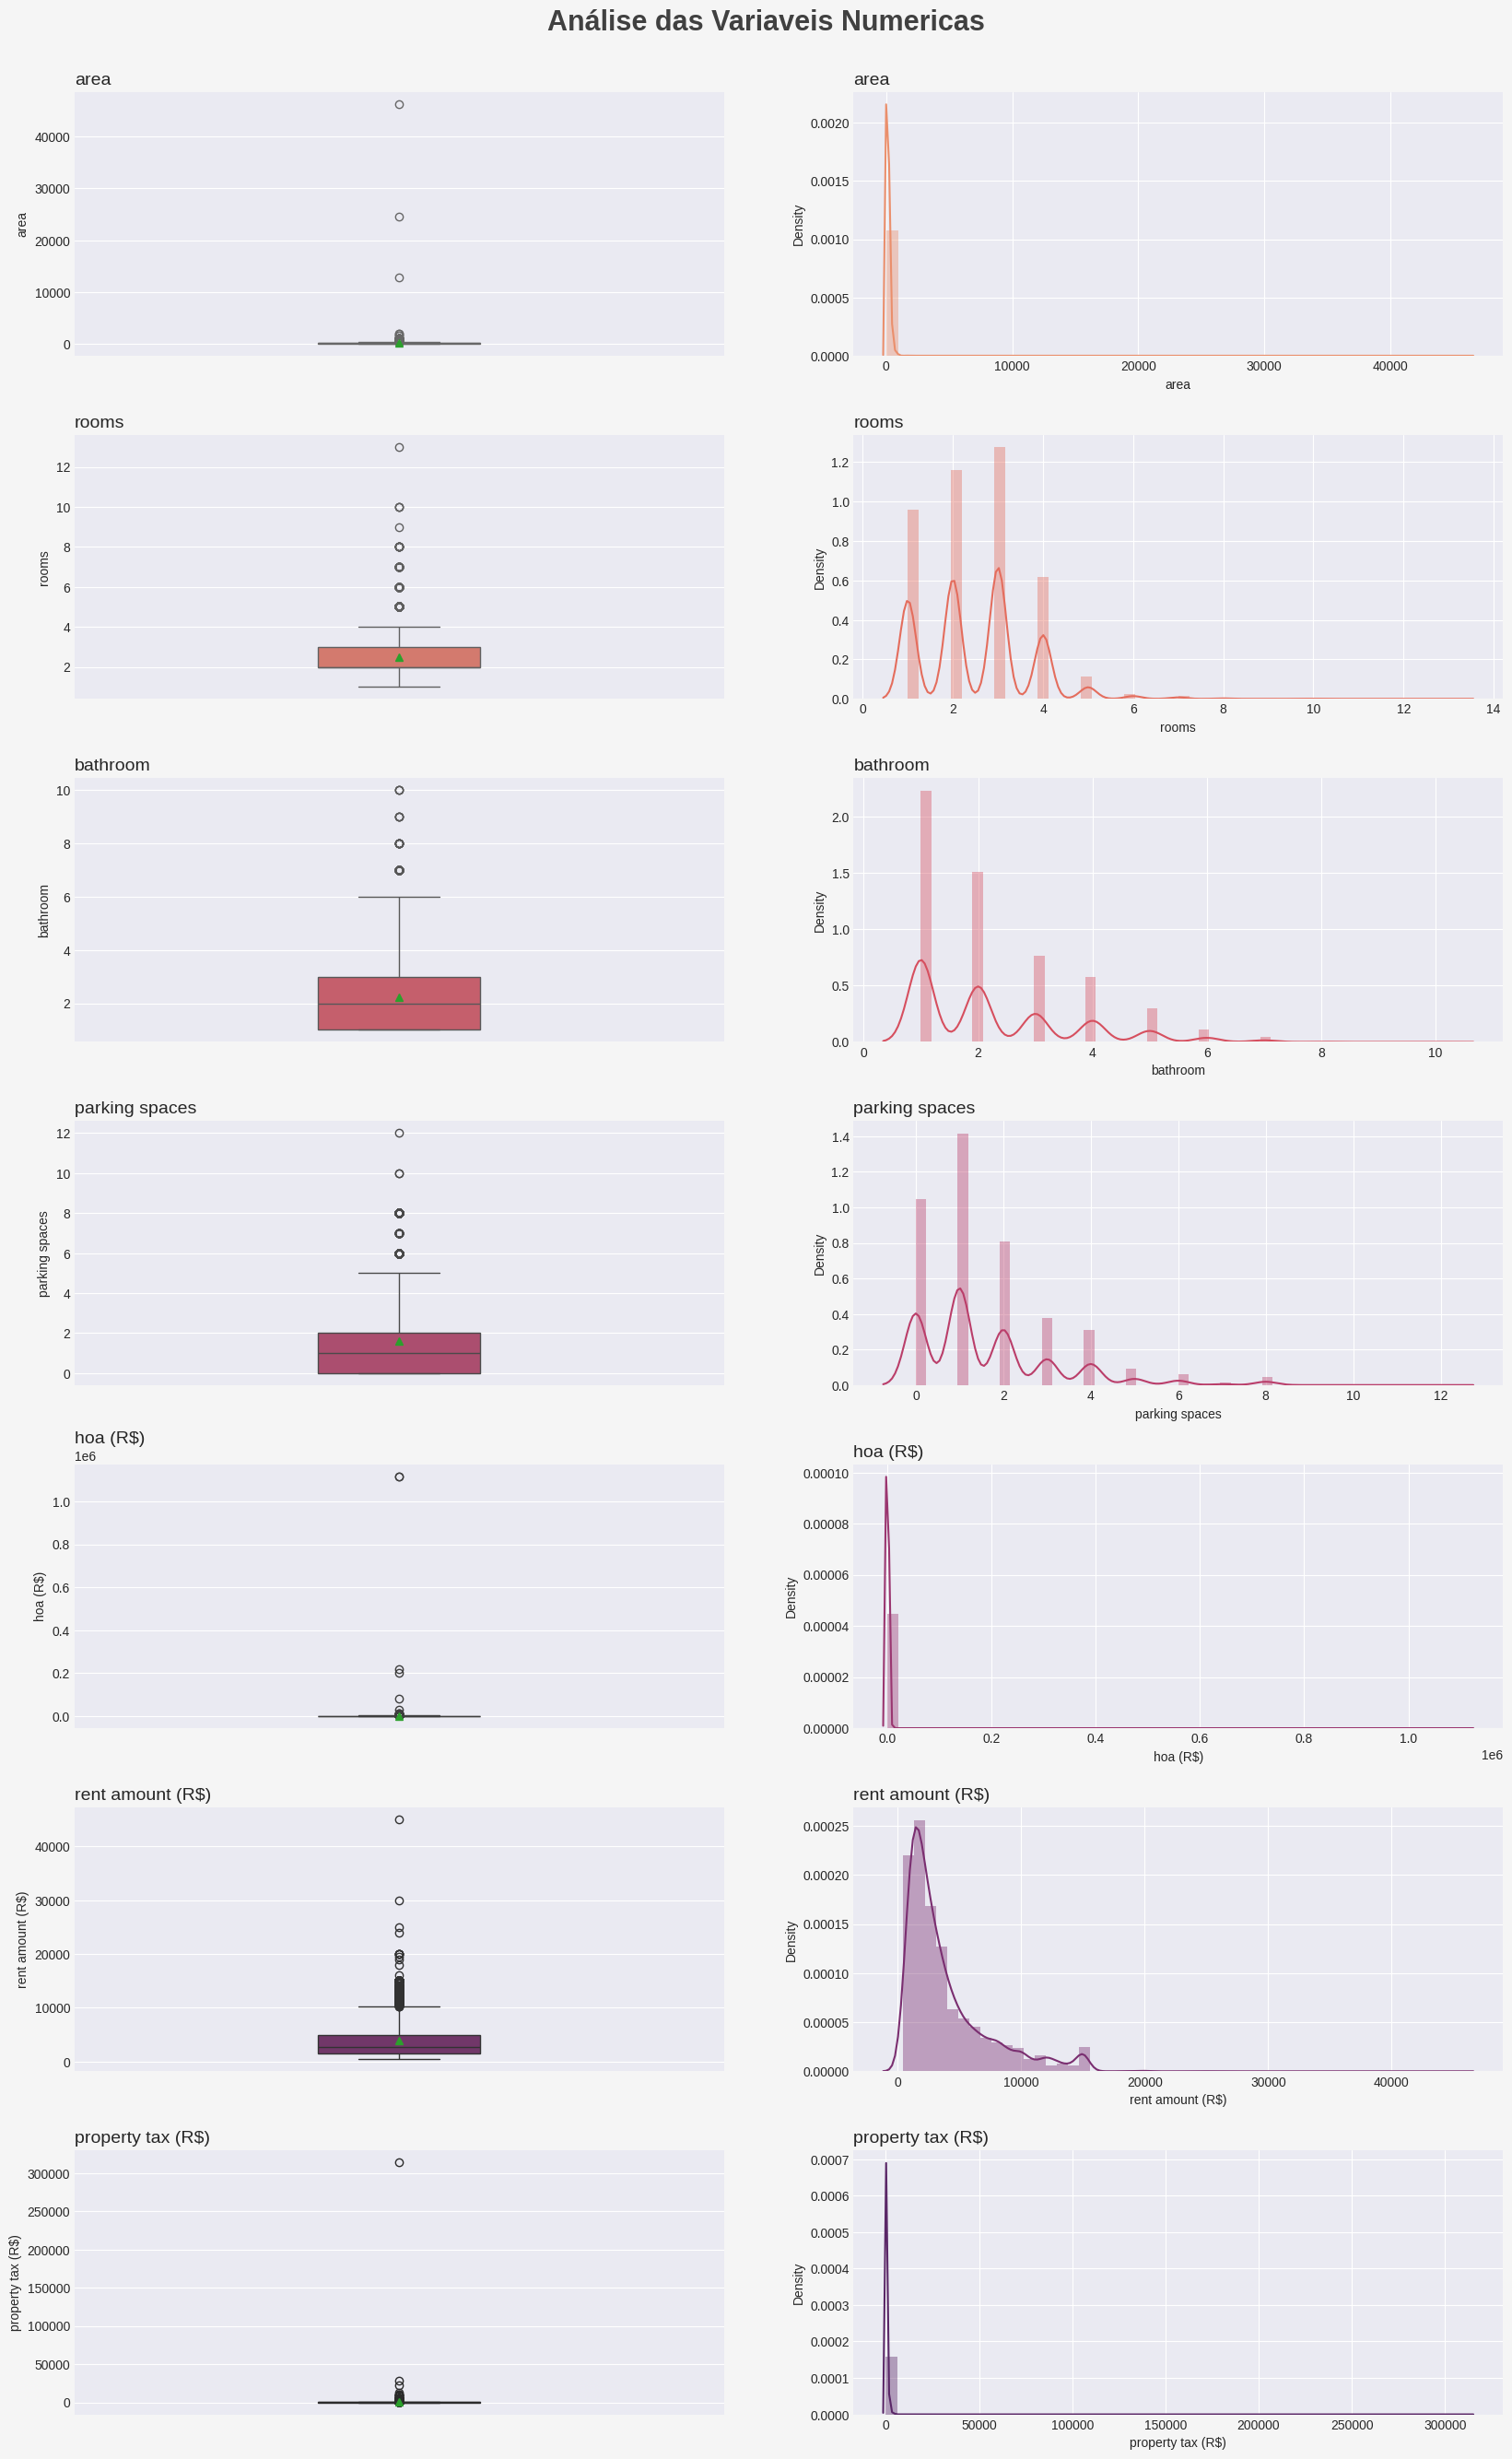

In [16]:
# Grid - Gráficos

# Tamanho
Figura, Eixo = plt.subplots( figsize=(20, 30) )

# Cor de fundo
Cor_Fundo = '#f5f5f5'
Figura.set_facecolor( Cor_Fundo)

# Paleta de Cores
Paleta_Cores = sns.color_palette( 'flare', len(Colunas_Numericas) * 2 )

# Titulo
plt.suptitle('Análise das Variaveis Numericas', fontsize=22, color='#404040',
             fontweight=600)

# Estrutura
Linhas = 7 # ( Todas as infos numericas )
Colunas = 2 # ( Boxplot - Distplot )
Posicao = 1 # Posicao incial do grid

# Loop para plotar os gráficos
for Coluna in Colunas_Numericas:

    # Plot no Grid -- Boxplot
    plt.subplot( Linhas, Colunas, Posicao )

    # Titulo
    plt.title( f'{Coluna}', loc='left', fontsize=14, fontweight=200 )

    # Plot
    sns.boxplot( data = Base_Dados, y = Coluna, showmeans = True,
                saturation = 0.75, linewidth = 1, color = Paleta_Cores[Posicao],
                 width = 0.25)

    # Mudar
    Posicao += 1

    # Plot no Grid -- Distplot
    plt.subplot( Linhas, Colunas, Posicao )

    # Titulo
    plt.title( f'{Coluna}', loc='left', fontsize=14, fontweight=200 )

    # Plot
    sns.distplot ( Base_Dados[Coluna], color = Paleta_Cores[ Posicao - 1] )

    # Mudar
    Posicao += 1

# Ajuste de Grid
plt.subplots_adjust( top=0.95, hspace=0.3 )

In [17]:
Base_Dados.loc[ Base_Dados['area'] <= 10000 ]['area'].describe()

count    10689.000000
mean       141.431846
std        134.348219
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max       2000.000000
Name: area, dtype: float64

In [18]:
Base_Dados.loc[ Base_Dados['hoa (R$)'] <= 10000 ]['hoa (R$)'].describe()

count    10683.000000
mean       911.949827
std       1104.885520
min          0.000000
25%        170.000000
50%        558.000000
75%       1230.000000
max      10000.000000
Name: hoa (R$), dtype: float64

In [19]:
Base_Dados['hoa (R$)'].sort_values( ascending = False ).head(20)

255      1117000
6979     1117000
6230      220000
2859      200000
2928       81150
1444       32000
1213       15000
415        14130
5293       14000
8858       10000
974        10000
547         9900
7020        9500
7679        9000
1862        8600
6185        8500
1072        8500
10184       8362
254         8300
722         8133
Name: hoa (R$), dtype: int64

In [20]:
Base_Dados.iloc[ 2928 ]

city                 Rio de Janeiro
area                             35
rooms                             1
bathroom                          1
parking spaces                    0
floor                             1
animal                        acept
furniture                 furnished
hoa (R$)                      81150
rent amount (R$)               4500
property tax (R$)              9900
Name: 2928, dtype: object

In [21]:
Base_Dados['rent amount (R$)'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: rent amount (R$), dtype: float64

In [22]:
Base_Dados.loc[ Base_Dados['rent amount (R$)'] <= 40000 ]['rent amount (R$)'].describe()

count    10691.000000
mean      3892.402488
std       3385.440586
min        450.000000
25%       1530.000000
50%       2660.000000
75%       5000.000000
max      30000.000000
Name: rent amount (R$), dtype: float64

In [23]:
Base_Dados.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)'],
      dtype='object')

In [24]:
Base_Dados['property tax (R$)'].sort_values( ascending = False ).head(20)

6645     313700
6243      28120
1699      21880
10172     12500
5331      10830
2928       9900
7674       9500
19         9500
8187       8750
2182       8750
5915       7859
7679       5917
9765       5834
421        5700
3494       5500
7459       5404
10410      5200
9595       5160
8399       5032
1862       5000
Name: property tax (R$), dtype: int64

In [25]:
Base_Dados.iloc[ 6645 ]

city                     São Paulo
area                            42
rooms                            1
bathroom                         2
parking spaces                   1
floor                            6
animal                   not acept
furniture            not furnished
hoa (R$)                       690
rent amount (R$)              2500
property tax (R$)           313700
Name: 6645, dtype: object

# **Eng de Features**

In [26]:
# Ajuste das colunas categoricas
Base_Dados['animal'] = Base_Dados['animal'].map({'acept':1, 'not acept':0})
Base_Dados['furniture'] = Base_Dados['furniture'].map({'furnished':1, 'not furnished':10})

# Filtrar a Cidade de São Paulo
Filtro_SP = Base_Dados.loc[Base_Dados['city'] == 'São Paulo']

# Verificar
Filtro_SP.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,10,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,10,0,800,25
5,São Paulo,376,3,3,7,0,1,10,0,8000,834
7,São Paulo,213,4,4,4,4,1,10,2254,3223,1735


In [27]:
# Retirando a Coluna Cidade
Filtro_SP.drop(columns=['city'], inplace=True)

In [28]:
# Separa os dados
Caracteristicas = Filtro_SP.drop(columns=['rent amount (R$)'])
Previsor = Filtro_SP['rent amount (R$)']

# Verificar
Caracteristicas.shape, Previsor.shape

((5887, 9), (5887,))

In [29]:
# Caracteristicas
Caracteristicas.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
0,70,2,1,1,7,1,1,2065,211
1,320,4,4,0,20,1,10,1200,1750
4,25,1,1,0,1,0,10,0,25
5,376,3,3,7,0,1,10,0,834
7,213,4,4,4,4,1,10,2254,1735


In [30]:
# Previsor
Previsor.head()

0    3300
1    4960
4     800
5    8000
7    3223
Name: rent amount (R$), dtype: int64

In [31]:
# Correlação
Filtro_SP.corr()

# Proximo de 1 - Correlação Positiva [ Ambas sobem ]
# Proximo de -1 - Correlação Negativa [ Uma sobe e outra desce ]

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
area,1.000000,0.306863,0.316543,0.300795,-0.038790,0.073565,0.018145,0.056091,0.274749,0.065289
rooms,0.306863,1.000000,0.759432,0.645041,-0.092117,0.213963,0.088931,0.136343,0.537622,0.071702
bathroom,0.316543,0.759432,1.000000,0.703530,-0.015503,0.159097,-0.005864,0.163205,0.638924,0.101616
parking spaces,0.300795,0.645041,0.703530,1.000000,-0.038378,0.165253,0.015155,0.115951,0.573373,0.092362
floor,-0.038790,-0.092117,-0.015503,-0.038378,1.000000,-0.014202,-0.135180,0.107211,0.065294,0.005672
animal,0.073565,0.213963,0.159097,0.165253,-0.014202,1.000000,0.066208,0.020575,0.107147,-0.005308
furniture,0.018145,0.088931,-0.005864,0.015155,-0.135180,0.066208,1.000000,-0.042860,-0.154316,0.007852
hoa (R$),0.056091,0.136343,0.163205,0.115951,0.107211,0.020575,-0.042860,1.000000,0.188147,0.028872
rent amount (R$),0.274749,0.537622,0.638924,0.573373,0.065294,0.107147,-0.154316,0.188147,1.000000,0.091749
property tax (R$),0.065289,0.071702,0.101616,0.092362,0.005672,-0.005308,0.007852,0.028872,0.091749,1.000000


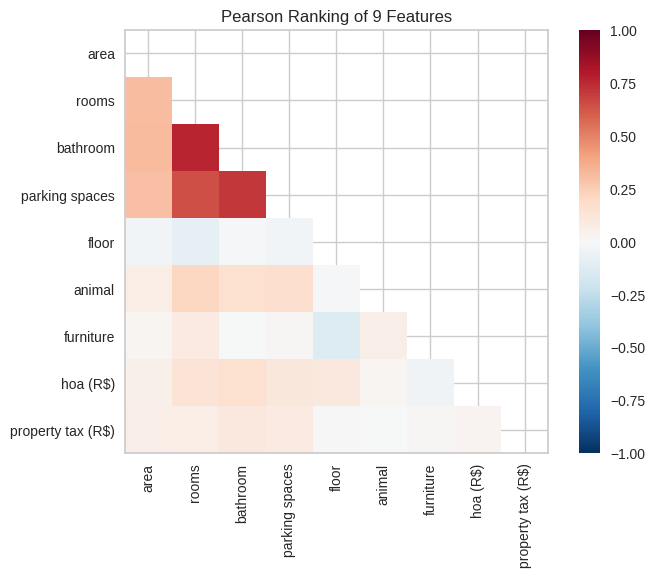

In [32]:
# Yellowbrick
from yellowbrick.features import Rank2D

# Definir o metodo
Correlacao = Rank2D(algoritmo='person')

# Fitar função
Correlacao.fit(Caracteristicas, Previsor)
Correlacao.transform(Caracteristicas)
Correlacao.show();

In [33]:
# Separa os dados
from sklearn.model_selection import train_test_split

# Divisão dos dados
x_treino, x_teste, y_treino, y_teste = train_test_split(
    Caracteristicas, Previsor, test_size = 0.2, random_state = 10
)

print(f"Dados de Treino: {x_treino.shape[0]}")
print(f"Dados de Teste: {x_teste.shape[0]}")

Dados de Treino: 4709
Dados de Teste: 1178


In [34]:
# Features mais relevantes
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

# Selecao de features
def Selecao_Features(x_treino, y_treino):

    # Configurar para selecionar as features
    Selecao = SelectKBest(score_func = mutual_info_regression, k = 'all')

    # Fitar o aprendizado
    Selecao.fit(x_treino, y_treino)

    return Selecao

# Aplcicar essa função
Scores = Selecao_Features(x_treino, y_treino)

# Analisar
for Posicao, Score in enumerate(Scores.scores_):
    print(f'{x_treino.columns[Posicao]} : {Score}')

area : 0.07117603595232547
rooms : 0.25318188827670296
bathroom : 0.3090643532907724
parking spaces : 0.23432889000737012
floor : 0.0340164087150403
animal : 0.03554848689233747
furniture : 0.029099171929744205
hoa (R$) : 0.07783219979758949
property tax (R$) : 0.16468825603070103


# **Construção do Modelo**

In [35]:
# Modelo Random Forest Regresson
from sklearn.ensemble import RandomForestRegressor

# Instanciar
Modelo_Floresta = RandomForestRegressor(max_depth=5)

# Fitar
Modelo_Floresta.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=5)

In [36]:
# Avaliar a performance
Previsoes = Modelo_Floresta.predict(x_teste)

# Funcao para avaliar
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

print(f'RMSE: {sqrt(mean_squared_error(y_teste, Previsoes))}')
print(f'Score: {r2_score(y_teste, Previsoes)}')

RMSE: 2469.753788644706
Score: 0.5585322340167114


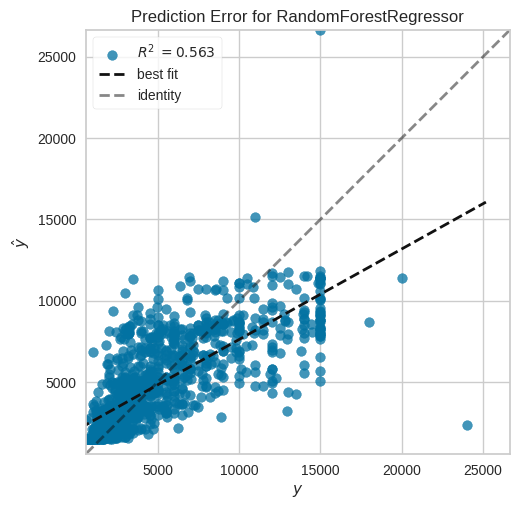

In [37]:
# Avaliando Yellowbrick
from yellowbrick.regressor import PredictionError

# Instanciar
Modelo = RandomForestRegressor(max_depth=5)
Erro_Modelo = PredictionError(Modelo)

# Fitar
Erro_Modelo.fit(x_treino, y_treino)
Erro_Modelo.score(x_teste, y_teste)
Erro_Modelo.show();

# **Exportação**

In [38]:
# Exportando o modelo
import joblib

# Funcao
joblib.dump(Modelo_Floresta, 'Modelo_Floresta_Aleatorio_v100.pkl')

['Modelo_Floresta_Aleatorio_v100.pkl']

In [39]:
# Testando o modelo treinado
Funcao_Modelo_Carregado = joblib.load('Modelo_Floresta_Aleatorio_v100.pkl')

In [40]:
# Testando
Funcao_Modelo_Carregado.predict(x_teste.head(1).values)

array([1521.54262757])

In [41]:
x_teste.head(2).values

array([[ 25,   1,   1,   0,   0,   0,  10,   0,  84],
       [480,   4,   5,   3,   0,   1,  10,   0, 742]])